# Modèles de covariance et processus gaussien


## Résumé

Dans ce segment, nous commençons par faire quelques rappels méthodologiques sur les processus gaussiens et les modèles de covariance. Nous analysons en particulier le modèle exponentiel carré. 
Nous montrons ensuite comment définir un modèle de covariance, une grille temporelle et un processus gaussien dans OpenTURNS. Nous observons l'influence des paramètres du modèle de covariance sur les trajectoires simulées. Nous présentons enfin comment définir la tendance.

## Références

* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.SquaredExponential.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.GaussianProcess.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.ProcessSample.html
* http://openturns.github.io/openturns/master/examples/probabilistic_modeling/trend_transform.html
* Carl Edward Rasmussen and Christopher K. I. Williams (2006) Gaussian Processes for Machine Learning. Chapter 4: "Covariance Functions", www.GaussianProcess.org/gpml

## Processus gaussien (scalaire) et modèle de covariance

Le domaine sur lequel le processus prend ses valeurs est noté $\mathcal{D} \subset \mathbb{R}^d$. 

*Exemple* : dans le cas d'un processus stochastique temporel, le domaine considéré est un intervalle de dates : $\mathcal{D} \subset \mathbb{R}$ ($d=1$), typiquement $\mathcal{D}=[\underline{x},\: \bar{x}]$ où $\underline{x}$ et $\bar{x}$ sont respectivement les dates initiale et finale considérées.

### Covariance

Pour toutes variables aléatoires réelles $Z$ et $Z'$, la covariance entre $Z$ et $Z'$ est définie par :
$$
Cov\left(Z,\:Z'\right) = \mathbb{E}\left[ \left(Z - \mathbb{E}(Z)\right) \left(Z' - \mathbb{E}\left(Z'\right)\right)\right].
$$

### Processus gaussien (scalaire)

Un processus stochastique réel $Z$ sur $\mathcal{D}$ est gaussien si, et seulement si, pour n'importe quel ensemble fini $\{\boldsymbol{x^{(1)}},\:\ldots,\:,\boldsymbol{x^{(k)}}\}\in\mathcal{D}$, le vecteur aléatoire 
$\left(\begin{array}{c}Z(\boldsymbol{x^{(1)}})\\\vdots\\Z(\boldsymbol{x^{(k)}})\end{array}\right) \in\mathbb{R}^k$
est un vecteur gaussien. 

Un processus gaussien $Z(\boldsymbol{x})$ est caractérisé par 
* sa (fonction) moyenne $m(\boldsymbol{x})= \mathbb{E}[Z(\boldsymbol{x})]$ 
* sa (fonction de) covariance $k(\boldsymbol{x},\:\boldsymbol{x}')= Cov(Z(\boldsymbol{x}),\:Z(\boldsymbol{x'}))$
pour tout $(\boldsymbol{x},\:\boldsymbol{x'})\in{\mathcal{D}}^2$.

La moyenne $m(\boldsymbol{x})$ d'un processus gaussien est souvent appelée *tendance* (en anglais : *trend*). 

Un processus gaussien de moyenne $m$ et de fonction de covariance $k$ est souvent noté :
$$Z(x) \sim PG\left(m(\boldsymbol{x}),\:k(\boldsymbol{x},\:\boldsymbol{x}')\right).$$

### Quelques propriétés

#### Ajout d'une tendance

Si $Z(x) \sim PG\left(m(\boldsymbol{x}),\:k(\boldsymbol{x},\:\boldsymbol{x}')\right)$ et $m':\mathcal{D}\rightarrow\mathbb{R}$, alors $Z(x)+m'(x) \sim PG\left(m(\boldsymbol{x})+m'(\boldsymbol{x}),\:k(\boldsymbol{x},\:\boldsymbol{x}')\right)$. En particulier :
* si $Z(x) \sim PG\left(m(\boldsymbol{x}),\:k(\boldsymbol{x},\:\boldsymbol{x}')\right)$, alors
$Z(x)-m(x) \sim PG\left(0,\:k(\boldsymbol{x},\:\boldsymbol{x}')\right)$ ;
* si $Z(x) \sim PG\left(0,\:k(\boldsymbol{x},\:\boldsymbol{x}')\right)$, alors
$Z(x)+m(x) \sim PG\left(m(\boldsymbol{x}),\:k(\boldsymbol{x},\:\boldsymbol{x}')\right)$.

#### Conditionnement

Si $\left(\begin{array}{c}X_1\\X_2\end{array}\right)\sim\mathcal{N}\left(\left(\begin{array}{c}\mu_1\\\mu_2\end{array}\right),\:\left(\begin{array}{cc}K_{11}\:K_{12}\\K_{12}^T\:K_{22}\end{array}\right)\right)$, 
alors
$X_1 \:|\: X_2=x_2 \sim\mathcal{N}\left(\mu_1+K_{12}{K_{22}}^{-1}(x_2-\mu_2),\:
K_{11}-K_{12}{K_{22}}^{-1}{K_{12}}^T\right)$.

Corrolaire : un processus gaussien conditionné est un processus gaussien.

#### Propriété de la fonction de covariance

Une fonction $k\,:\mathcal{D}\times\mathcal{D}\rightarrow\mathbb{R}$ symétrique est dite définie positive si, et seulement si, pour tout $k\in\mathbb{N}^*$ et tout ensemble $\{\boldsymbol{x}^{(1)},\:\ldots,\:\boldsymbol{x}^{(k)}\}\in\mathcal{D}$ (points distincts), alors  
$$
\sum_{i,j=1}^k a_i\:a_j\:k\left(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)}\right) \geq 0,
$$
pour tous $a_1,...,a_k\in\mathbb{R}$.

Une telle fonction est appelée *noyau* en théorie des espaces de Hilbert à noyau reproduisant (RKHS). Tout noyau peut être utilisé comme fonction de covariance (assure l'obtention de matrices de covariance semie-définies positives); réciproquement, toute fonction de covariance est un noyau.

### Modèle de covariance stationnaire

Un modèle de covariance *stationnaire* ne dépend que de la différence $\boldsymbol{x}- \boldsymbol{x'}$,
c'est-à-dire :
$$
k(\boldsymbol{x}, \boldsymbol{x'}) = k(\boldsymbol{x}- \boldsymbol{x'}),
$$
pour tous $\boldsymbol{x},\boldsymbol{x'}\in\mathcal{D}$.

Pour construire un métamodèle par krigeage, la fonction de covariance est généralement supposée stationnaire, ce qui n'apparaît pas une hypothèse très forte (si une manière d'introduire la métamodélisation par krigeage est de faire l'hypothèse que la fonction à métamodéliser est la réalisation d'un processus stochastique, ce n'est qu'une vue de l'esprit : on ne pourrait pas disposer d'autres réalisations de ce processus afin de tester sa stationnarité).
Si $k$ est une fonction de covariance stationnaire, alors
$$
Var[Z(x)] = Cov\left(Z(x),\,Z(x)\right) = k(\boldsymbol{x},\,\boldsymbol{x}) = k(0),
$$
pour tout $x\in\mathcal{D}$.
Autrement dit, si la fonction de covariance est stationnaire, la variance $k(0) = \sigma^2$ en un point est constante sur tout le domaine $\mathcal{D}$. Il est alors possible de paramétrer la covariance du processus gaussien en paramétrant la fonction de corrélation $r$ :
$$
k(\boldsymbol{x},\,\boldsymbol{x}') = \sigma^2 r(\boldsymbol{x},\,\boldsymbol{x}',\,\boldsymbol{\theta})
$$
où 
* $\sigma^2$ est la variance du processus gaussien
* et $\boldsymbol{\theta} \in\mathbb{R}^d$ les paramètres de la fonction de corrélation $r$.

Les paramètres $\sigma$ et $\boldsymbol{\theta}$ sont souvent nommés *hyperparamètres*. Avec certains modèles, faire varier certaines composantes de $\boldsymbol{\theta}$ a pour effet de changer la régularité du processus gaussien (continuité et différentiabilité des trajectoires ou en moyenne quadratique). 


## Exemple : le modèle exponentiel carré anisotrope

Le modèle exponentiel carré anisotrope est la fonction de covariance définie par :
$$
k(\boldsymbol{x}, \boldsymbol{x'}) 
= \sigma^2 \exp\left( -\frac{1}{2} \left\|\frac{\boldsymbol{x}-\boldsymbol{x'}}{\boldsymbol{\theta}}\right\|_2^2\right)
$$
pour tout $\boldsymbol{x},\boldsymbol{x'} \in \mathcal{D}$ 
où la division entre le vecteur $\boldsymbol{x}-\boldsymbol{x'}$ au numérateur et le vecteur $\boldsymbol{\theta}$ au dénominateur est la division composante par composante :
$$
{\left(\frac{\boldsymbol{x}-\boldsymbol{x'}}{\boldsymbol{\theta}}\right)}_i
= \frac{x_i-{x'}_i}{\theta_i}
$$
pour $i=1,...,d$.

Si toutes les composantes du vecteur d'hyperparamètres $\boldsymbol{\theta}\in\mathbb{R}^d$ sont égales alors le modèle est *isotrope* (même comportement dans chacune des $d$ dimensions/directions du domaine $\mathcal{D}$), sinon il est *anisotrope*. 

La classe `SquaredExponential` permet de construire des modèles de covariances de ce type :
* le paramètre $\sigma\in\mathbb{R}$ est le paramètre d'amplitude,
* le paramètre $\boldsymbol{\theta}\in\mathbb{R}^d$ est le paramètre d'échelle.

In [1]:
import openturns as ot

In [2]:
# Amplitude values
amplitude = [3.5] # Processus à valeur dans R
# Scale values
scale = [1.5] # Processus sur un domaine dans R
# Covariance model
myModel = ot.SquaredExponential(scale, amplitude)

## Les processus gaussiens dans OpenTURNS

Pour créer un processus gaussien avec la classe `GaussianProcess`, il faut disposer 
* d'un modèle de covariance,
* d'un maillage.

De manière optionnelle, on peut considérer, en complément, une tendance (nous verrons comment le faire par la suite). Par défaut, le processus gaussien dans OpenTURNS est associé à une tendance nulle. 

Considérons le domaine $\mathcal{D}=[\underline{x},\:\bar{x}]$ où $\underline{x}=0$ et $\bar{x}=10$. 

Nous discrétisons ce domaine avec une grille régulière contenant $n=100$ mailles (et $n+1$ nœuds) par pas de $0.1$ à partir de $\underline{x}=0$ : 
$$
(x_0=\underline{x}=0,\:x_1=0.1,\:\ldots,\:x_n=\bar{x}=10).
$$

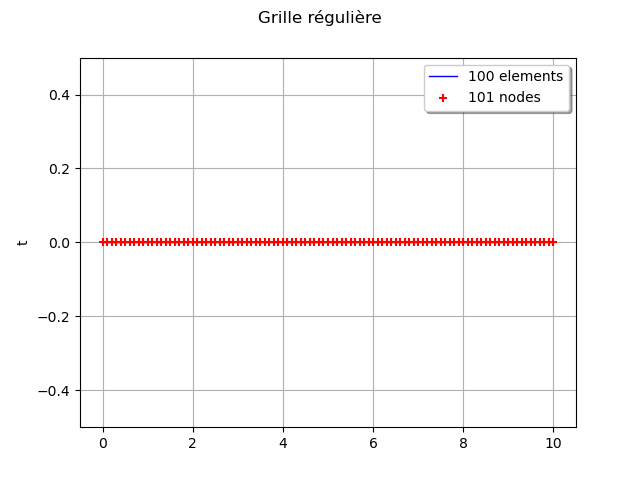

In [3]:
xmin = 0.0
step = 0.1
n = 100
myTimeGrid = ot.RegularGrid(xmin, step, n+1)
graph = myTimeGrid.draw()
graph.setTitle("Grille régulière")
graph

Puis on crée le processus. Par défaut, la tendance est nulle.

In [4]:
process = ot.GaussianProcess(myModel, myTimeGrid)
print(process)

GaussianProcess(trend=[x0]->[0], covariance=SquaredExponential(scale=[1.5], amplitude=[3.5]))


On génère ensuite un ensemble de 10 trajectoires avec la méthode `getSample`. Ces trajectoires sont stockées dans un `ProcessSample`. 

In [5]:
nbTrajectories = 10
sample = process.getSample(nbTrajectories)



Il est facile de dessiner ces trajectoires avec la méthode `drawMarginal`.

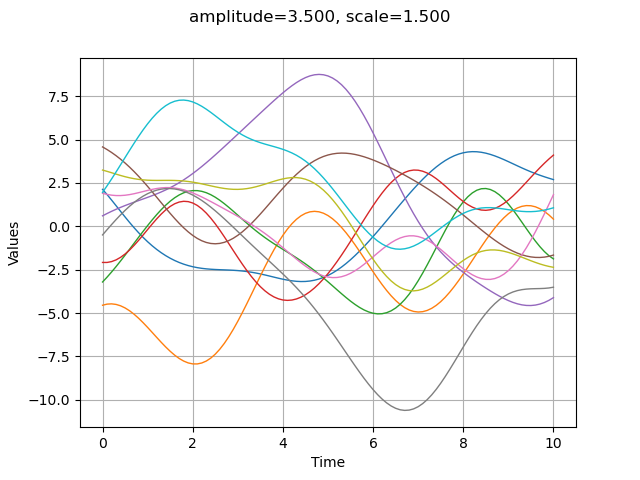

In [6]:
graph = sample.drawMarginal(0)
graph.setTitle("amplitude=%.3f, scale=%.3f" % (amplitude[0], scale[0]))
graph

Pour faciliter le travail, on créée une fonction qui dessiner le nombre donné de trajectoires.

In [7]:
def plotCovarianceModel(myCovarianceModel,myTimeGrid,nbTrajectories):
    '''Plots the given number of trajectories with given covariance model.'''
    process = ot.GaussianProcess(myCovarianceModel, myTimeGrid)
    sample = process.getSample(nbTrajectories)
    graph = sample.drawMarginal(0)
    graph.setTitle("")
    return graph

Le paramètre d'amplitude caractérise la variance du processus. Une valeur plus grande implique des valeurs absolues plus élevées. 

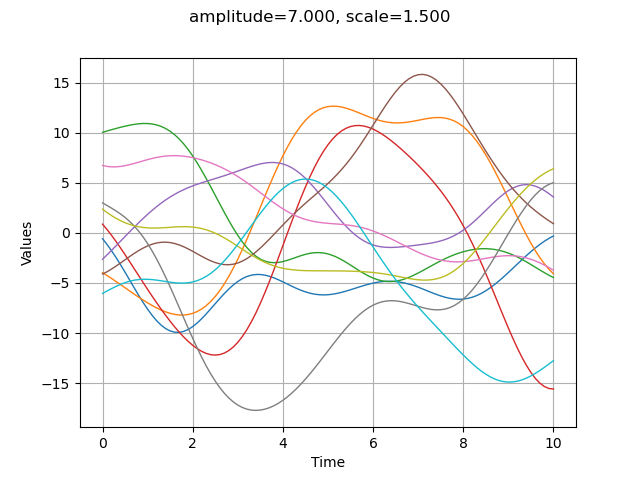

In [8]:
amplitude = [7.]
scale = [1.5]
myModel = ot.SquaredExponential(scale, amplitude)
graph = plotCovarianceModel(myModel,myTimeGrid,10)
graph.setTitle("amplitude=%.3f, scale=%.3f" % (amplitude[0], scale[0]))
graph


Jouer sur l'unique paramètre d'échelle revient ici à dilater ou contracter le processus suivant le « temps » $x$. 

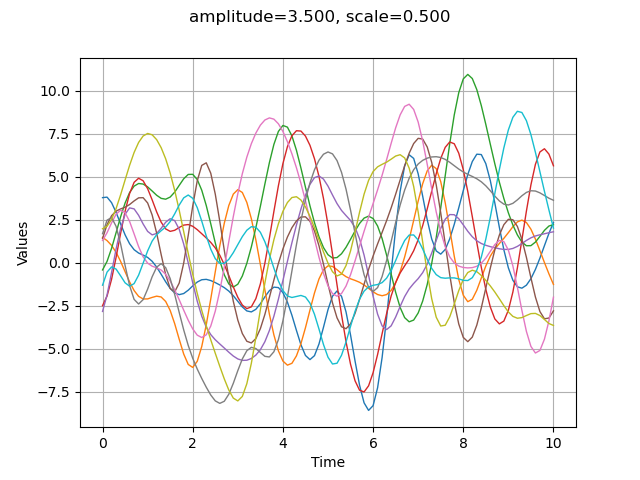

In [9]:
amplitude = [3.5]
scale = [0.5]
myModel = ot.SquaredExponential(scale, amplitude)
graph = plotCovarianceModel(myModel,myTimeGrid,10)
graph.setTitle("amplitude=%.3f, scale=%.3f" % (amplitude[0], scale[0]))
graph

## Définir la tendance

* La tendance est une fonction déterministe. 
* Avec la classe `GaussianProcess`, le processus ainsi créé est la somme d'une tendance et d'un processus gaussien de moyenne nulle. 



In [10]:
f = ot.SymbolicFunction(['x'], ['2*x'])
fTrend = ot.TrendTransform(f,myTimeGrid)

In [11]:
amplitude = [3.5]
scale = [1.5]
myModel = ot.SquaredExponential(scale, amplitude)
process = ot.GaussianProcess(fTrend,myModel, myTimeGrid)
print(process)

GaussianProcess(trend=[x]->[2*x], covariance=SquaredExponential(scale=[1.5], amplitude=[3.5]))


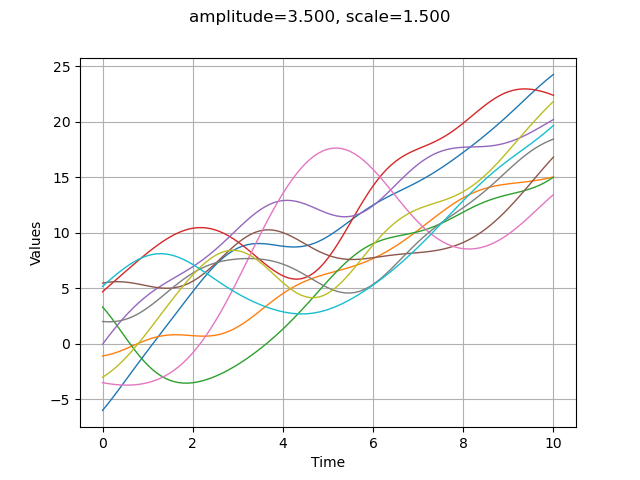

In [12]:
nbTrajectories = 10
sample = process.getSample(nbTrajectories)
graph = sample.drawMarginal(0)
graph.setTitle("amplitude=%.3f, scale=%.3f" % (amplitude[0], scale[0]))
graph

## Exercices

### Exercice 1 : noyau de Matérn et noyau exponentiel

Il y a d'autres modèles de covariances paramétriques dans OpenTURNS. Parmi les plus utilisés, on trouve :
* SquaredExponential. Certainement le plus utilisé. Ce modèle possède des dérivées à tous les ordres. Les processus gaussiens associés sont différentiables en moyenne quadratique à tous les ordres. 
* MaternModel. Le deuxième plus utilisé. Lorsque le paramètre $\nu\rightarrow+\infty$, converge vers le modèle exponentiel carré. Ce modèle est dérivable $k$ fois seulement si $k<\nu$. En d'autres termes, lorsque $\nu$ augmente, alors les trajectoires sont de plus en plus régulières. Le cas particulier $\nu=1/2$ est le modèle exponentiel.
* ExponentialModel. Le processus associé est continu, mais non différentiable.
* AbsoluteExponential
* GeneralizedExponential

**Questions**

* Pour les modèles de covariance suivants, dessiner 10 trajectoires en utilisant la fonction `plotCovarianceModel`.

In [13]:
amplitude = [1.0]
scale = [1.0]
nu1, nu2, nu3 = 2.5, 1.5, 0.5
myModel1 = ot.MaternModel(scale, amplitude, nu1)
myModel2 = ot.MaternModel(scale, amplitude, nu2)
myModel3 = ot.MaternModel(scale, amplitude, nu3)
#
myExpModel = ot.ExponentialModel(scale, amplitude)

In [14]:
process1 = ot.GaussianProcess(myModel1, myTimeGrid)
process2 = ot.GaussianProcess(myModel2, myTimeGrid)
process3 = ot.GaussianProcess(myModel3, myTimeGrid)
processExp = ot.GaussianProcess(myExpModel, myTimeGrid)
nbTrajectories = 10
sample1 = process1.getSample(nbTrajectories)
sample2 = process2.getSample(nbTrajectories)
sample3 = process3.getSample(nbTrajectories)
sampleExp = processExp.getSample(nbTrajectories)

graph1 = sample1.drawMarginal(0)
graph1.setTitle("Matern nu=%.1f" % nu1)
graph2 = sample2.drawMarginal(0)
graph2.setTitle("Matern nu=%.1f" % nu2)
graph3 = sample3.drawMarginal(0)
graph3.setTitle("Matern nu=%.1f" % nu3)
graphExp = sampleExp.drawMarginal(0)
graphExp.setTitle("Exponential")    

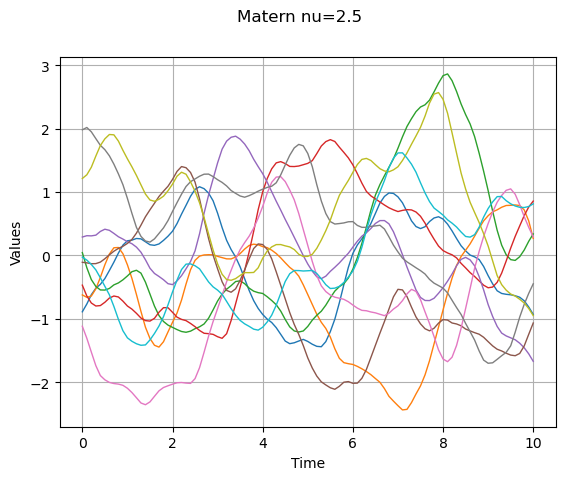

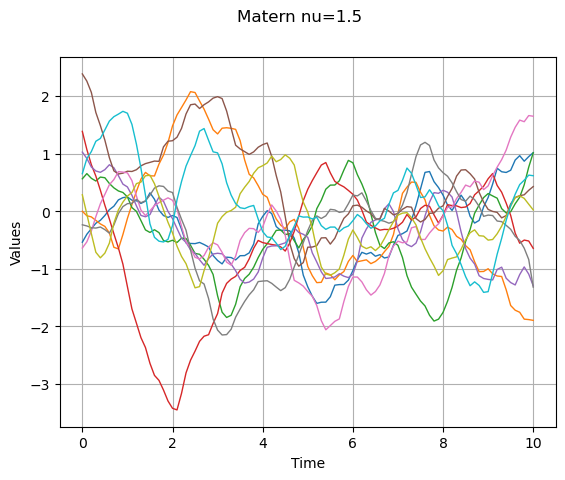

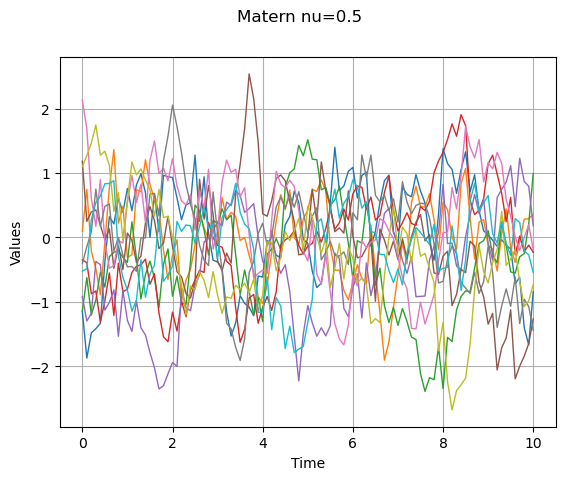

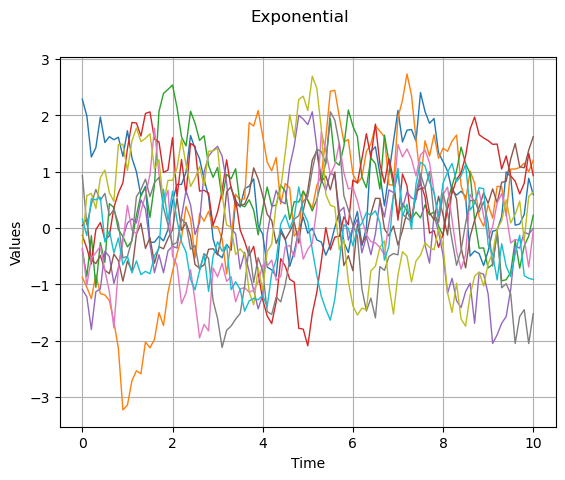

In [15]:
ot.Show(graph1)
ot.Show(graph2)
ot.Show(graph3)
ot.Show(graphExp)

* Quelle influence a le choix du modèle de covariance sur les trajectoires ?

On peut observer une différence de régularité dans les trajectoires. Pour Mattern ($\nu = 2.5$), les trajectoire sont $C^1$ alors que pour les autres elles semblent être $C^0$

### Exercice 2 : matrice de covariance

La matrice de covariance discrétisée sur la grille est la matrice de covariance carrée, symétrique définie par :
$$
\Sigma = {\left(k(x_i,\:x_j)\right)}_{i,\,j=0,\,\ldots,\,n}
$$
où $n$ est le nombre de mailles. 

* Utiliser la méthode `discretize` du modèle de covariance pour évaluer la matrice de covariance discrétisée `Sigma`.
* Utiliser la méthode `getDimension` pour observer sa dimension.
* Utiliser la fonction `type` pour observer le type de la matrice.

In [16]:
Sigma=myModel.discretize(myTimeGrid)

dim = Sigma.getDimension()
type = type(Sigma)
print("Dimension of the covariance matrix: ", dim)
print("Type of the covariance matrix: ", type)

Dimension of the covariance matrix:  101
Type of the covariance matrix:  <class 'openturns.typ.CovarianceMatrix'>


* Utiliser la méthode `getDimension` pour observer sa dimension.


* Utiliser la fonction `type` pour observer le type de la matrice.

### Exercice 3 : générer des réalisations d'un vecteur gaussien



Pour colorer vos trajectoires, vous pouvez utiliser la fonction suivante.

In [17]:
def createHSVColor(indexCurve,maximumNumberOfCurves):
    '''Create a HSV color for the indexCurve-th curve 
    from a sample with maximum size equal to maximumNumberOfCurves'''
    color = ot.Drawable.ConvertFromHSV(indexCurve * 360.0/maximumNumberOfCurves, 1.0, 1.0)
    return color

Pour réaliser l'exercice, vous pouvez vous appuyer sur le squelette suivant, dans lequel vous remplacerez les sections *TODO* par du code Python valide.

    n=100
    mu = TODO
    myNormalVector = TODO
    nbTrajectories = TODO
    trajectoires = TODO
    graph = ot.Graph("%d realizations of a Gaussian vector" % (nbTrajectories),"Time","Value",True)
    x = range(n+1)
    for i in range(nbTrajectories):
        curve = ot.Curve(TODO)
        curve.setColor(createHSVColor(i,nbTrajectories))
        graph.add(curve)
    graph

* Utiliser la classe `Normal` pour créer un vecteur Gaussien en dimension `n=101` de moyenne nulle et dont la matrice de covariance `Sigma` est celle de l'exercice précédent. 


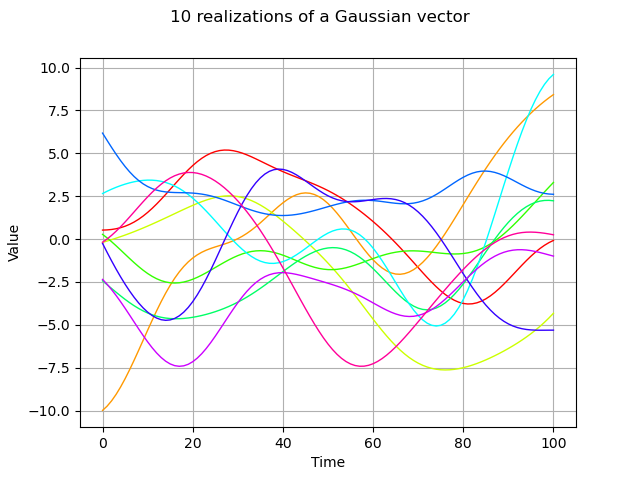

In [18]:
n=100
mu = ot.Point(n+1)*0
myNormalVector = ot.Normal(mu,Sigma)
nbTrajectories = 10
trajectoires = myNormalVector.getSample(nbTrajectories)
graph = ot.Graph("%d realizations of a Gaussian vector" % (nbTrajectories),"Time","Value",True)
x = range(n+1)
for i in range(nbTrajectories):
    curve = ot.Curve(x, trajectoires[i])
    curve.setColor(createHSVColor(i,nbTrajectories))
    graph.add(curve)
graph

* Utiliser la méthode `getSample` pour générer un échantillon de `nbTrajectories` trajectoires. 


* Dans quelles circonstances pourrait-il être coûteux de générer une trajectoire d'un processus gaussien ?

### Exercice 4 : processus gaussien et vecteur gaussien

Nous considérons toujours dans cet exercice la grille temporelle précédente $(x_0=0,\:x_1=0.1,\:\ldots,\:x_n=10)$ constitués de $n+1=101$ points.

Une propriété importante pour un processus gaussien $Z$ tel que ceux définis précédemment sur cette grille est que ${\left(Z_{x_0},\:\ldots,\:Z_{x_n}\right)}^T$ est un vecteur gaussien. L'objectif de cet exercice est de le vérifier expérimentalement.

* Générer `nbTrajectories=10000` trajectoires du processus gaussien associé à la grille temporelle précédente. En sortie, on obtient les trajectoires discrétisées ${\left(Z^j_{x_0},\:\ldots,\:Z^j_{x_n}\right)}^T$ pour tout $j=0,\,\ldots,\,nbTrajectories-1$.

In [19]:
nbTrajectories = 10000
process = ot.GaussianProcess(myModel, myTimeGrid)
sample = process.getSample(nbTrajectories)


* Choisissez un indice de maille $i$ entre $0$ et $n$, à votre convenance. 

In [23]:
i = ot.RandomGenerator.IntegerGenerate(n)
print("Index of the time point selected: ", i)

Index of the time point selected:  92


* Pour la date $x_i$ correspondante, créer un échantillon contenant les valeurs des trajectoires à cette date particulière. En d'autres termes, créer l'échantillon des $Z^j(x_i)$, pour $j=0,...,nbTrajectories-1$.

* Utiliser la classe `HistogramFactory` pour dessiner une approximation de la distribution de cet échantillon par un histogramme. Qu'observez-vous ?

* Créer la variable gaussienne univariée associée au nœud $x_i$. Superposer l'histogramme empirique et la PDF de la gaussienne exacte. Qu'observez-vous ?

* Utiliser le test visuel de la droite de Henry sur l'échantillon.

* Si on ajoute une tendance au processus gaussien, comment doit-on modifier la variable gaussienne univariée associée ?

* Bonus : réaliser une analyse similaire avec un échantillon de dimension deux correspondant à $Z(x_i)$ et $Z(x_i)+Z(x_{i'})$ où $i'\neq{}i$.